# Alberi ed Ensemble

## _Apprendimento Automatico_ | LM in *Data Science*

##      

da Python Machine Learning - Code Examples | Ch. 7 e [documentazione](https://scikit-learn.org/stable/modules/ensemble.html) ufficiale di scikit-learn

In [63]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 19.1 MB/s eta 0:00:00m eta 0:00:010:00:01


## Alberi di Decisione

In [2]:
Image(url='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch03/images/03_17.png', width=500) 

In [3]:
Image(url='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch03/images/03_18.png', width=500) 

## Misure d'Impurità

In [4]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

Text(0, 0.5, 'indice di impurità')

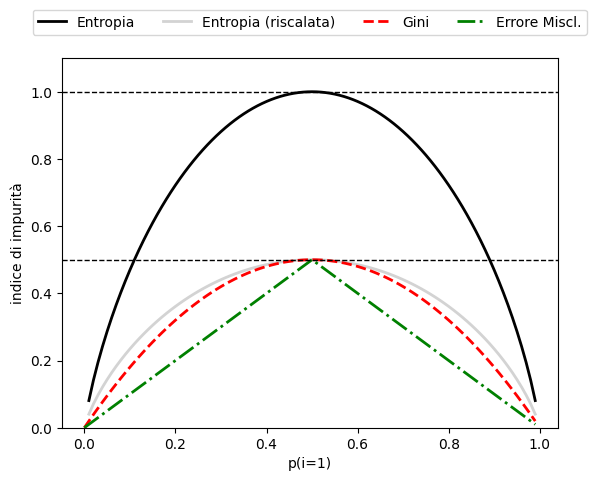

In [5]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropia', 'Entropia (riscalata)', 'Gini', 'Errore Miscl.'], 
                          ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('indice di impurità')

## Costruzione di un Albero

### Modulo `sklearn.tree`

Il modulo offre diversi modelli ad albero: 

| classe | uso |
|:- |:- |
|`DecisionTreeClassifier(*[, criterion, ...])`|albero di decisione per la classificazione|
|`DecisionTreeRegressor(*[, criterion, ...])`|albero di decisione per la regressione|
|`ExtraTreeClassifier(*[, criterion, ...])`|albero estremamente randomizzato per la classificazione|
|`ExtraTreeRegressor(*[, criterion, ...])`|albero estremamente randomizzato per la regressione|

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup dei marker e della mappa colori
    markers = ('s', '^', 'o', '*', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot della superficie di decisione
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    # evidenzia es. di test
    if test_idx:
        # plot di tutti gli es.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],  
                    c='white', edgecolor='black', alpha=0.5, 
                    linewidth=1, marker='o', s=100, label='test')

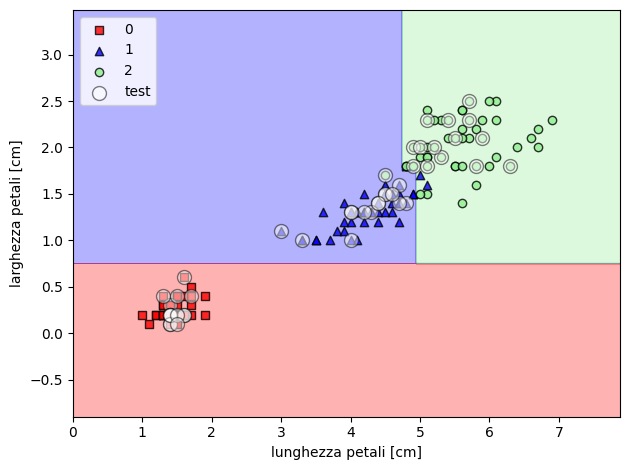

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

plt.xlabel('lunghezza petali [cm]')
plt.ylabel('larghezza petali [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

Si vedano anche:

|||
|-:|:-
|`plot_tree(decision_tree, *[, ...])` | Plot dell'albero
|`export_text(decision_tree, *[, ...])` | Costruisce un report testuale che mostra le regole estratte da un albero
|`export_graphviz(decision_tree[, ...])` | Esporta un albero in formato DOT 


In [8]:
from sklearn.tree import export_text
r = export_text(tree_model,  feature_names=['petal length', 'petal width'])
print(r)

|--- petal width <= 0.75
|   |--- class: 0
|--- petal width >  0.75
|   |--- petal length <= 4.75
|   |   |--- class: 1
|   |--- petal length >  4.75
|   |   |--- petal width <= 1.75
|   |   |   |--- petal length <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length >  4.95
|   |   |   |   |--- class: 2
|   |   |--- petal width >  1.75
|   |   |   |--- petal length <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length >  4.85
|   |   |   |   |--- class: 2



[Text(0.25, 0.9, 'x[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.1875, 0.8, 'True  '),
 Text(0.375, 0.7, 'x[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3125, 0.8, '  False'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'x[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'x[0] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

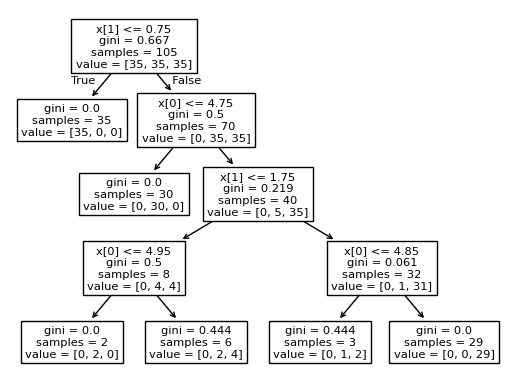

In [9]:
from sklearn import tree
tree.plot_tree(tree_model)

In [10]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

Per l'installazione: `conda install -c conda-forge pydotplus` oppure `pip install pydotplus`

**NB** deve anche essere installato `graphviz`

In [12]:
Image(url='tree.png', width=500) 

### Dall'Albero di decisione alle Regole

dalla [doc](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html) di sklearn

- analisi della struttura dell'albero

### Esempio Iris

dalla [doc](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html) di sklearn

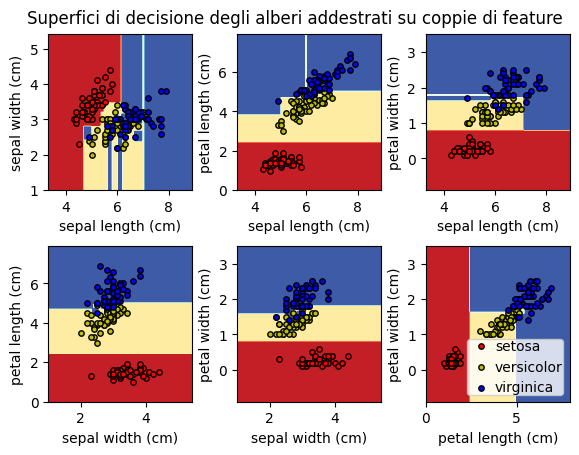

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # solo coppie di feature
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot delle sup. di decisione
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot dei dati di training 
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Superfici di decisione degli alberi addestrati su coppie di feature")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

## Alberi di regressione

dalla [doc](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) di sklearn

### Regressione monodimensionale

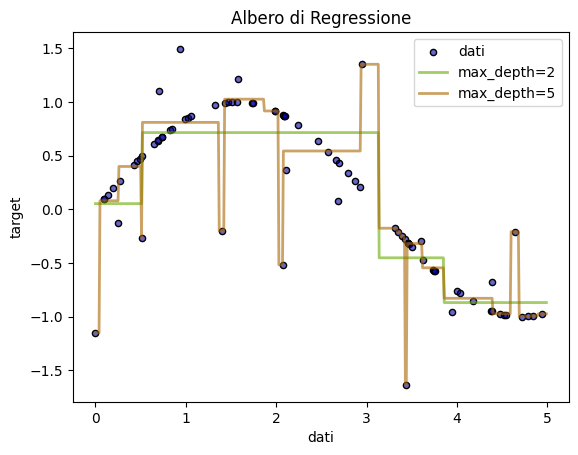

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# creazione dataset 1D
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# addestramento
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# predizione
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# plot risultati
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="#0000aa99", label="dati")
plt.plot(X_test, y_1, color="#66aa0099", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="#aa660099", label="max_depth=5", linewidth=2)
plt.xlabel("dati")
plt.ylabel("target")
plt.title("Albero di Regressione")
plt.legend()
plt.show()

### Regressione Multipla

dalla [doc](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) di sklearn

- alberi per predire contemporaneamente oss. x e y rumorose di una circonferenza data da una singola feature
- risultato:  regressione lineare locale che approssima la circonferenza the circle
- con una profondità massima (`max_depth`) troppo grande gli alberi apprreendono dettagli troppo precisi del training set compreso il **rumore** 

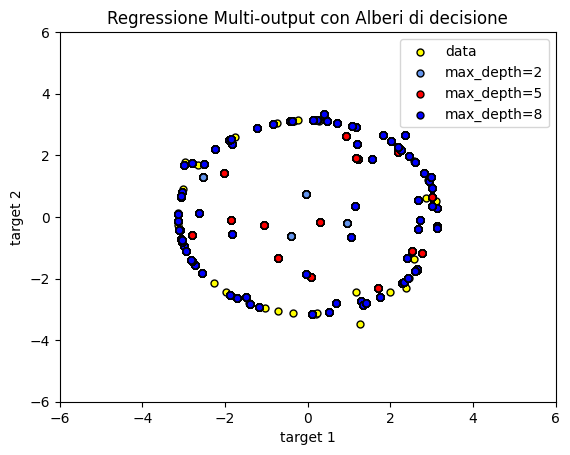

In [15]:
from sklearn.tree import DecisionTreeRegressor


rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# plot risultati
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="yellow", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="blue", s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Regressione Multi-output con Alberi di decisione")
plt.legend(loc="best")
plt.show()

### Esercizi

1. Estendere l'esempio usando il dataset __Iris__ con tutti gli attributi
2. Si confrontino modelli diversi per lo stesso task su altro dataset
3. Stampare le regole estratte da un albero
4. Usando i modelli di `sklearn.tree` 
    1. confronto fra `DecisionTreeClassifier` e `ExtraTreeClassifier` su uno stesso dataset
        - con ricerca degli iperparametri e CV al variare dei test set
    2. confronto fra `DecisionTreeRegressor` e `ExtraTreeRegressor` su uno stesso dataset
        - idem

# Apprendimento con Ensemble

## Combinazione di Predizioni

+ _unanimità_ degli esperti
+ _maggioranza_ degli esperti: classificazione binaria
+ _pluralità_ degli esperti: problema multi-classe

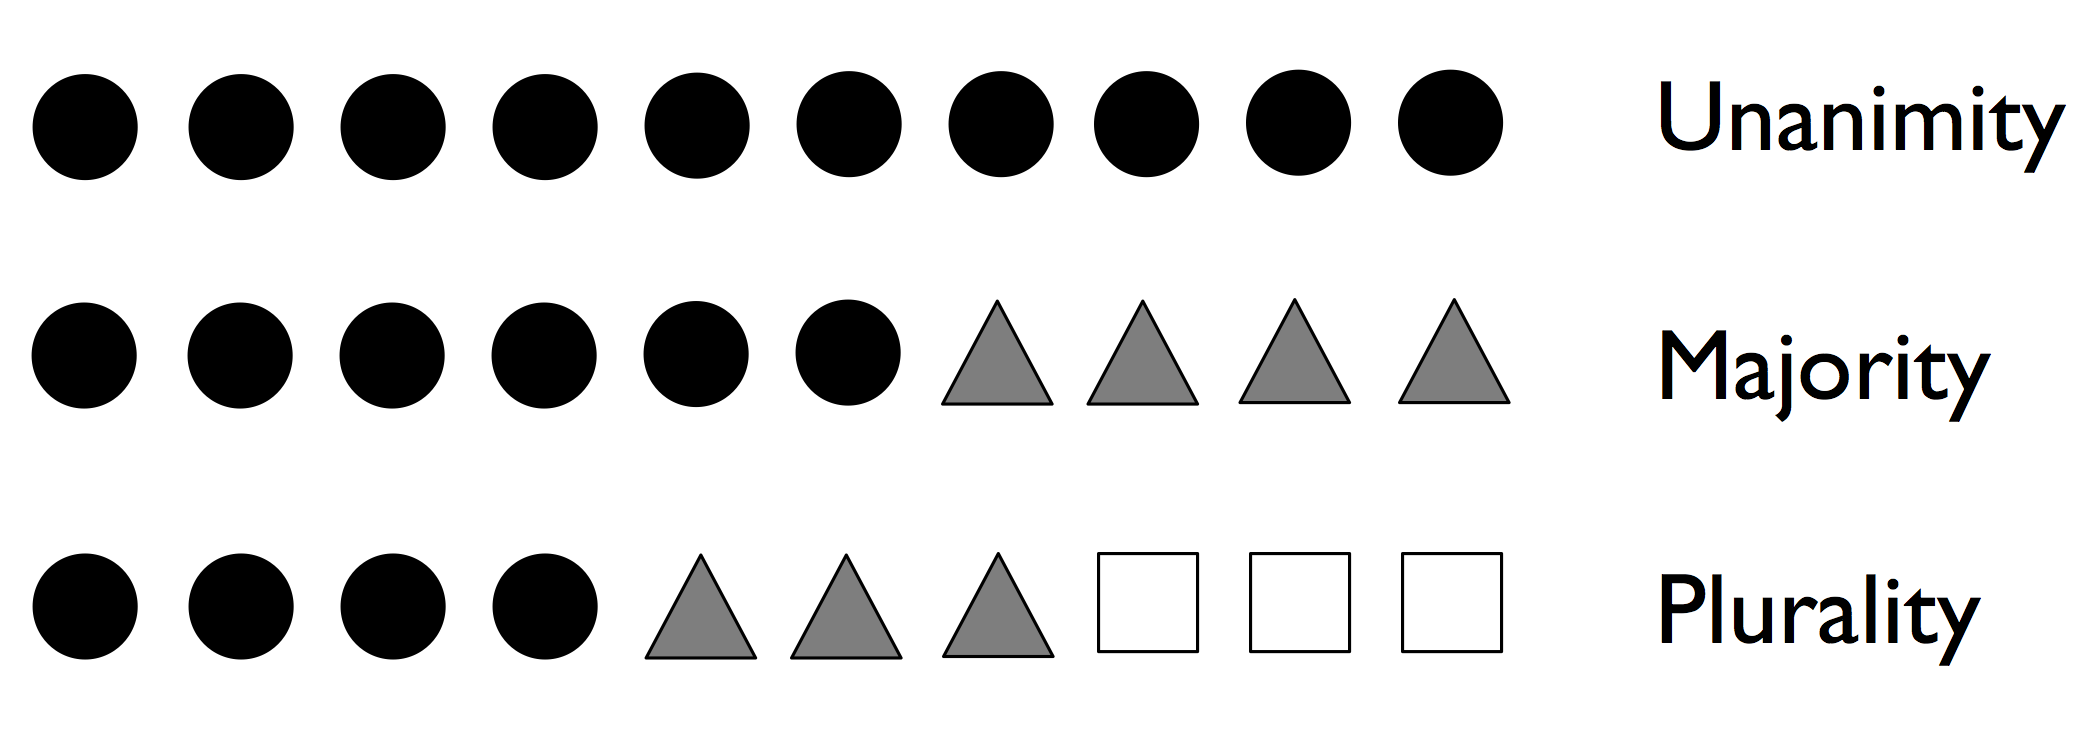

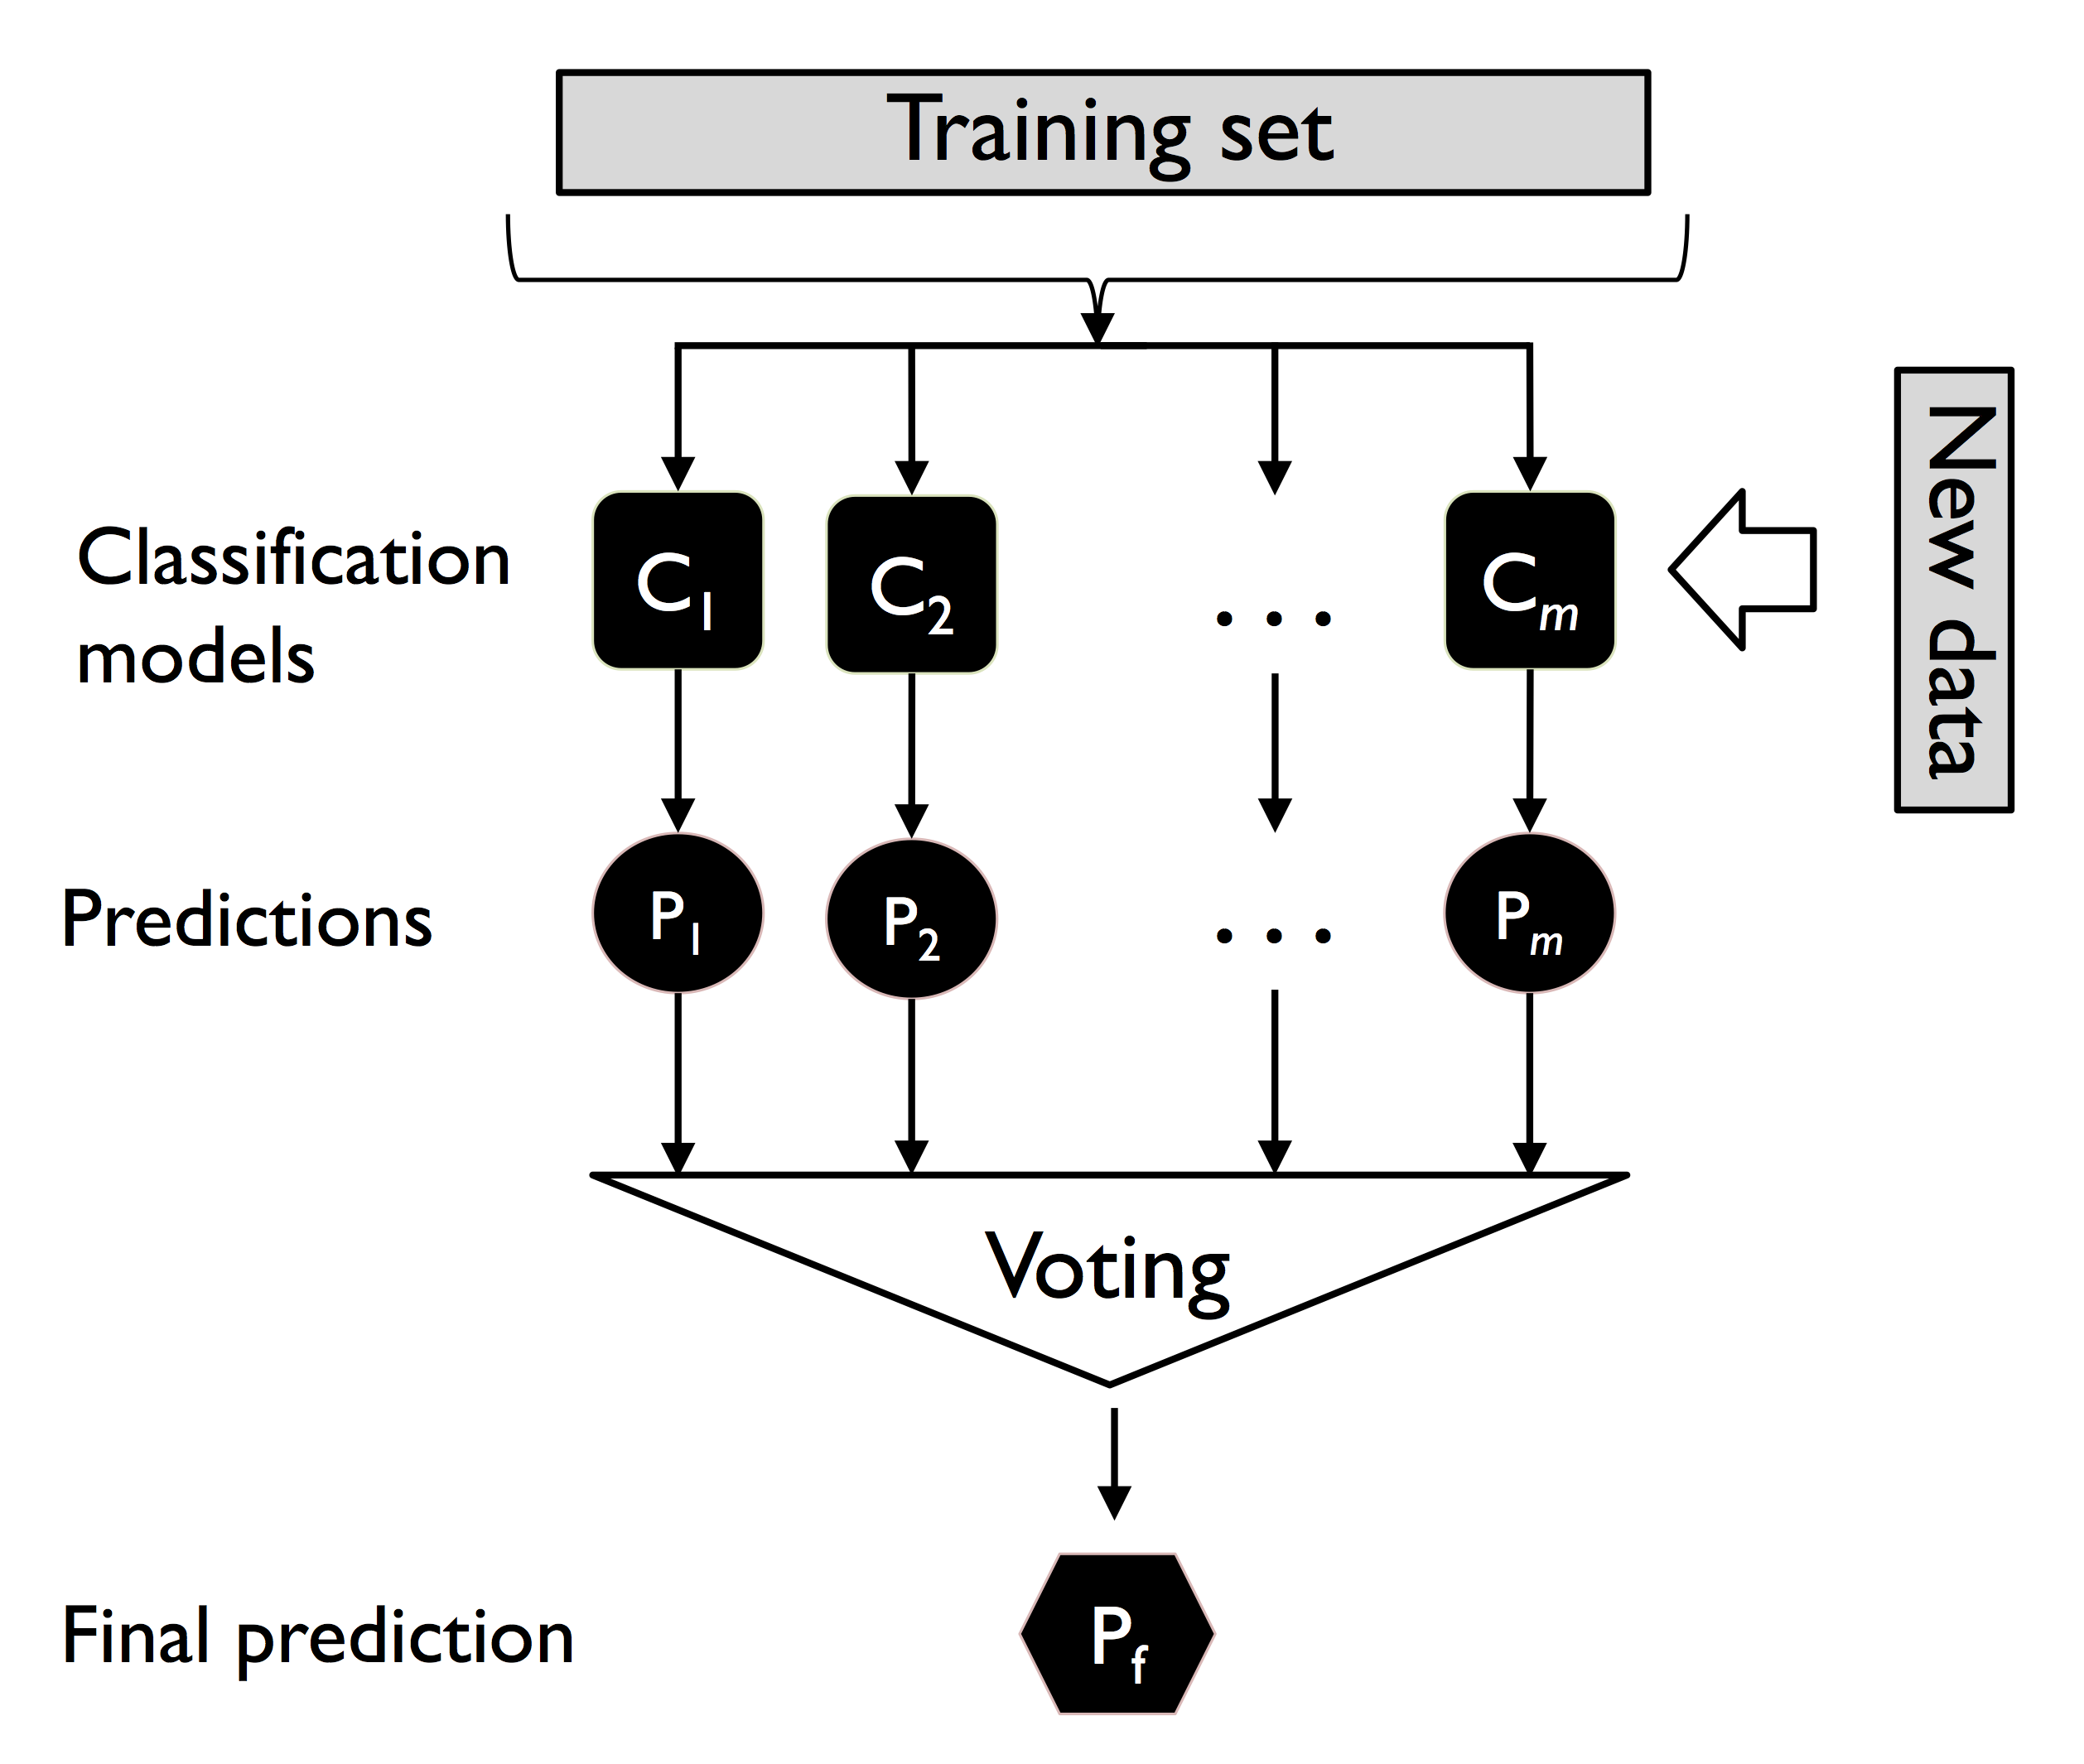

**Assunzioni**:
- $n$ classificatori-base binari con lo stesso tasso di errore $\epsilon$ 
    - classificatori indipendenti, ed errori non correlati

Probabilità d'errore di un ensemble di classificatori-base binari dalla _distribuzione binomiale_: $$E_\text{ens} = P(y>k) = \sum_{i=k}^n \binom{n}{i}\epsilon^i (1-\epsilon)^{n-i}$$



#### Esempio
Calcolo dell'*errore cumulativo* dell'ensemble $E_\textrm{ens}$:

In [16]:
from scipy.special import comb # combinazioni, c. binomiale
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)

In [17]:
ensemble_error(n_classifier=11, error=0.25)

np.float64(0.03432750701904297)

### Esempio

Confronto errori del modello base e dell'ensemble

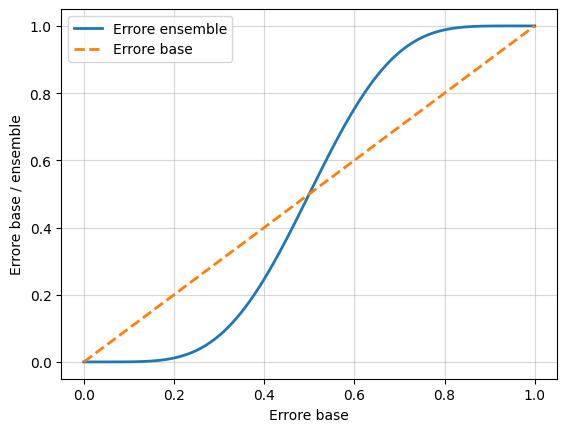

In [18]:
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

plt.plot(error_range, ens_errors,  label='Errore ensemble', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Errore base', linewidth=2)

plt.xlabel('Errore base')
plt.ylabel('Errore base / ensemble')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# Sezione [`sklearn.ensemble`](https://scikit-learn.org/stable/api/sklearn.ensemble.html#module-sklearn.ensemble)


I **metodi ensemble** in `scikit-learn` combinano le predizioni di stimatori-base costruiti tramite singoli algoritmi per migliorare  robustezza e capacità di generalizzare

Famiglie di metodi ensemble:
+ Metodi di *averaging*: costruzione <u>indipendente</u> di stimatori diversi e _mediazione_ sulle loro predizioni 
    + in media, lo stimatore combinato è di solito migliore di ognuno degli stimatori-base poiché vede ridotta la sua varianza
        - Esempi: metodi Bagging, Random Forest, …
+ Metodi di *boosting*: stimatori-base costruiti <u>in modo sequenziale</u> 
    - obiettivo: ridurre il bias nello stimatore combinato
    - si combinano diversi modelli deboli per produrre un ensemble più forte
        - Esempi: AdaBoost, Gradient Tree Boosting, …

In [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble):

|**classi** | *modello* |
|:-------------------------------------|:----------------------------------------------------------------------|
|`ensemble.AdaBoostClassifier([…])` | classificatore AdaBoost |
|`ensemble.AdaBoostRegressor([base_estimator, …])` | regressore AdaBoost  |
|`ensemble.BaggingClassifier([base_estimator, …])` | classificatore via Bagging |
|`ensemble.BaggingRegressor([base_estimator, …])`| regressore via Bagging |
|`ensemble.ExtraTreesClassifier([…])` | classificatore Extra-trees |
|`ensemble.ExtraTreesRegressor([n_estimators, …])` | regressore Extra-trees |
|`ensemble.GradientBoostingClassifier(*[, …])`| classificatore via Gradient Boosting |
|`ensemble.GradientBoostingRegressor(*[, …])` | regressore via Gradient Boosting |
|`ensemble.RandomForestClassifier([…])` | classificatore con Random Forest |
|`ensemble.RandomForestRegressor([…])` | regressore con Random Forest |
|`ensemble.StackingClassifier(estimators[, …])` | stack di stimatori con classificatore finale |
|`ensemble.StackingRegressor(estimators[, …])` | stack di stimatori con regressore finale |
|`ensemble.VotingClassifier(estimators, *[, …])` | classificatore con regola di maggioranza per stimatori non addestrati |
|`ensemble.VotingRegressor(estimators, *[, …])` | regressore con voto di predizione per stimatori non addestrati |
|`ensemble.HistGradientBoostingRegressor([…])` | albero di Regressione con Gradient Boosting basato su istogramma |
|`ensemble.HistGradientBoostingClassifier([…])` | albero di Classificazione con Gradient Boosting basato su istogramma |

|**classi** | *modello* |
|:-------------------------------------|:----------------------------------------------------------------------|
|`ensemble.IsolationForest(*[, n_estimators, …])` | algoritmo Isolation Forest: ricerca di outlier |
|`ensemble.RandomTreesEmbedding([…])` | ensemble di alberi totalmente casuali per ricavare embedding sparsi |

Si veda la sezione [_Ensemble methods_](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) della documentazione per ulteriori dettagli

## Random Forest

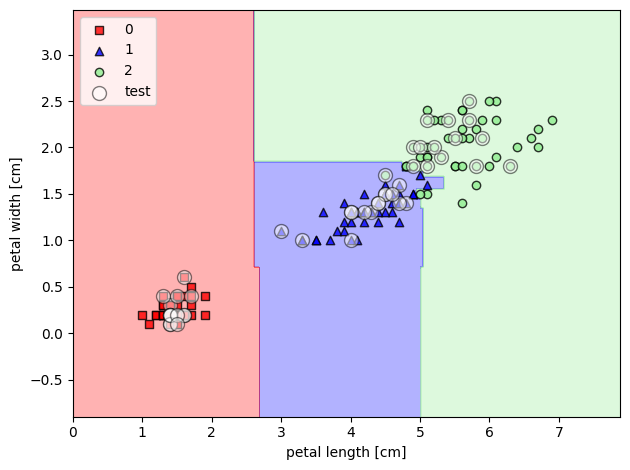

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

## Bagging 
### Ensemble di Classificatori da Campioni Bootstrap

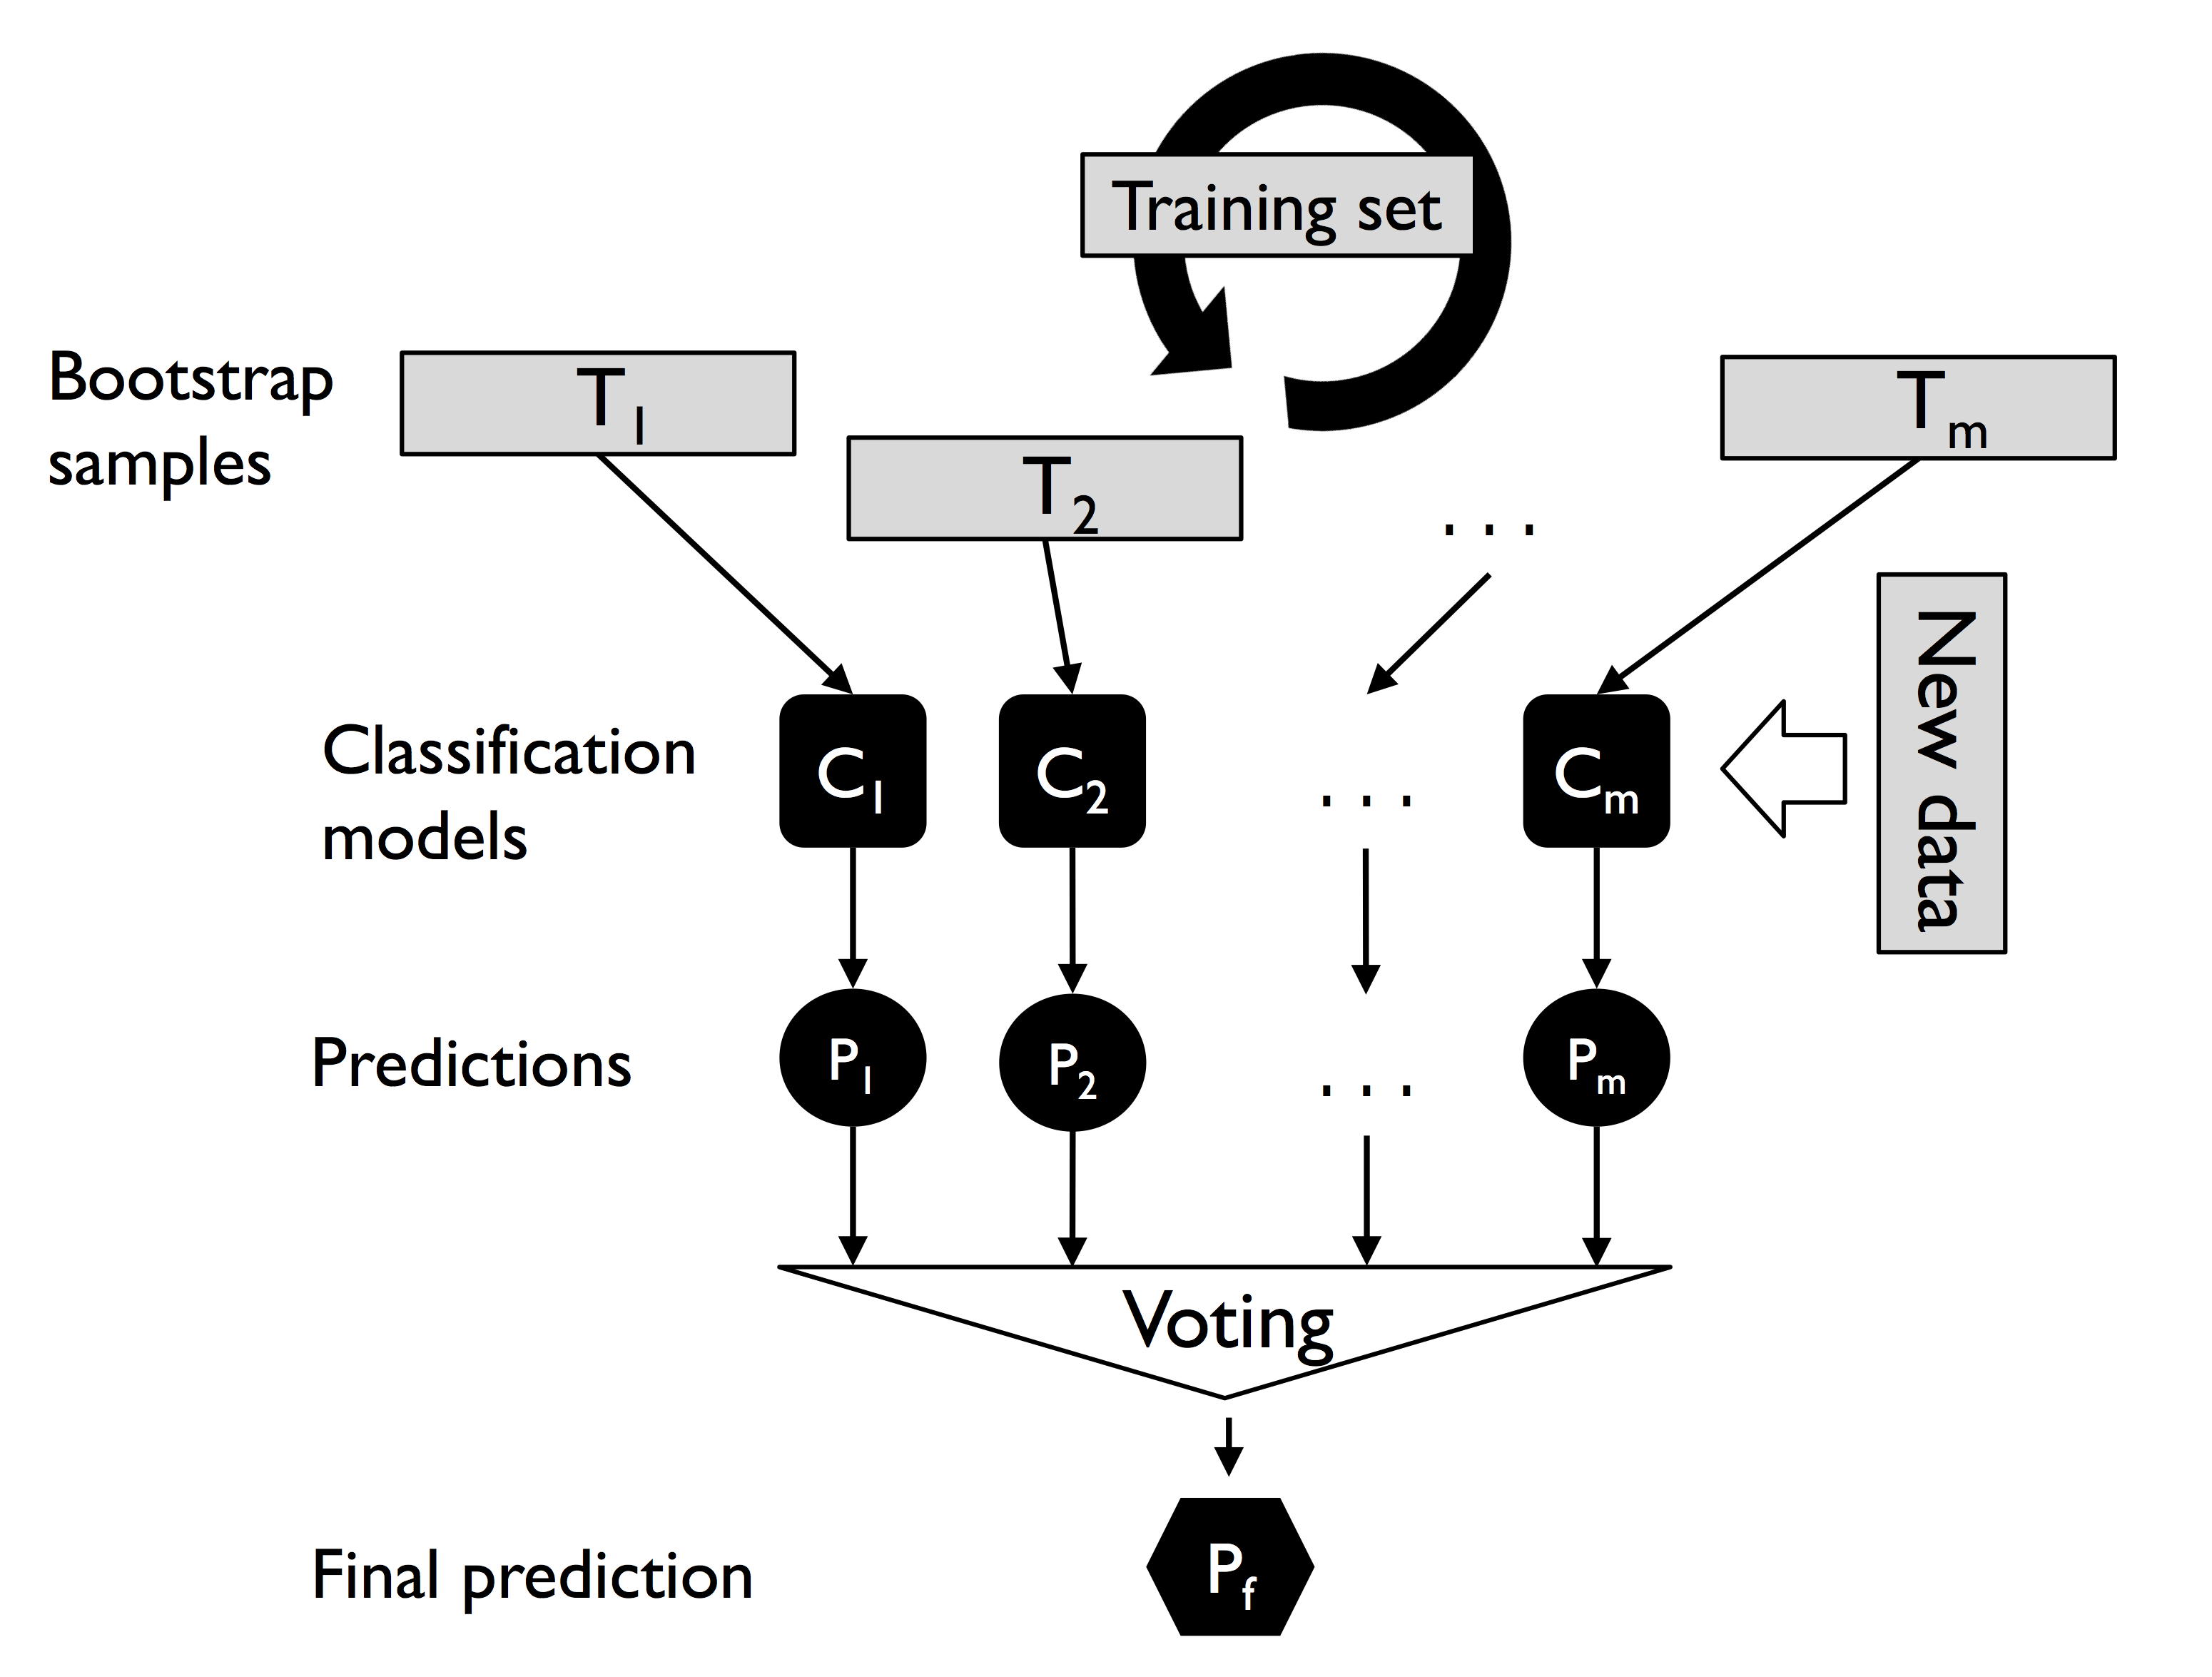

### Il Bagging in Sintesi

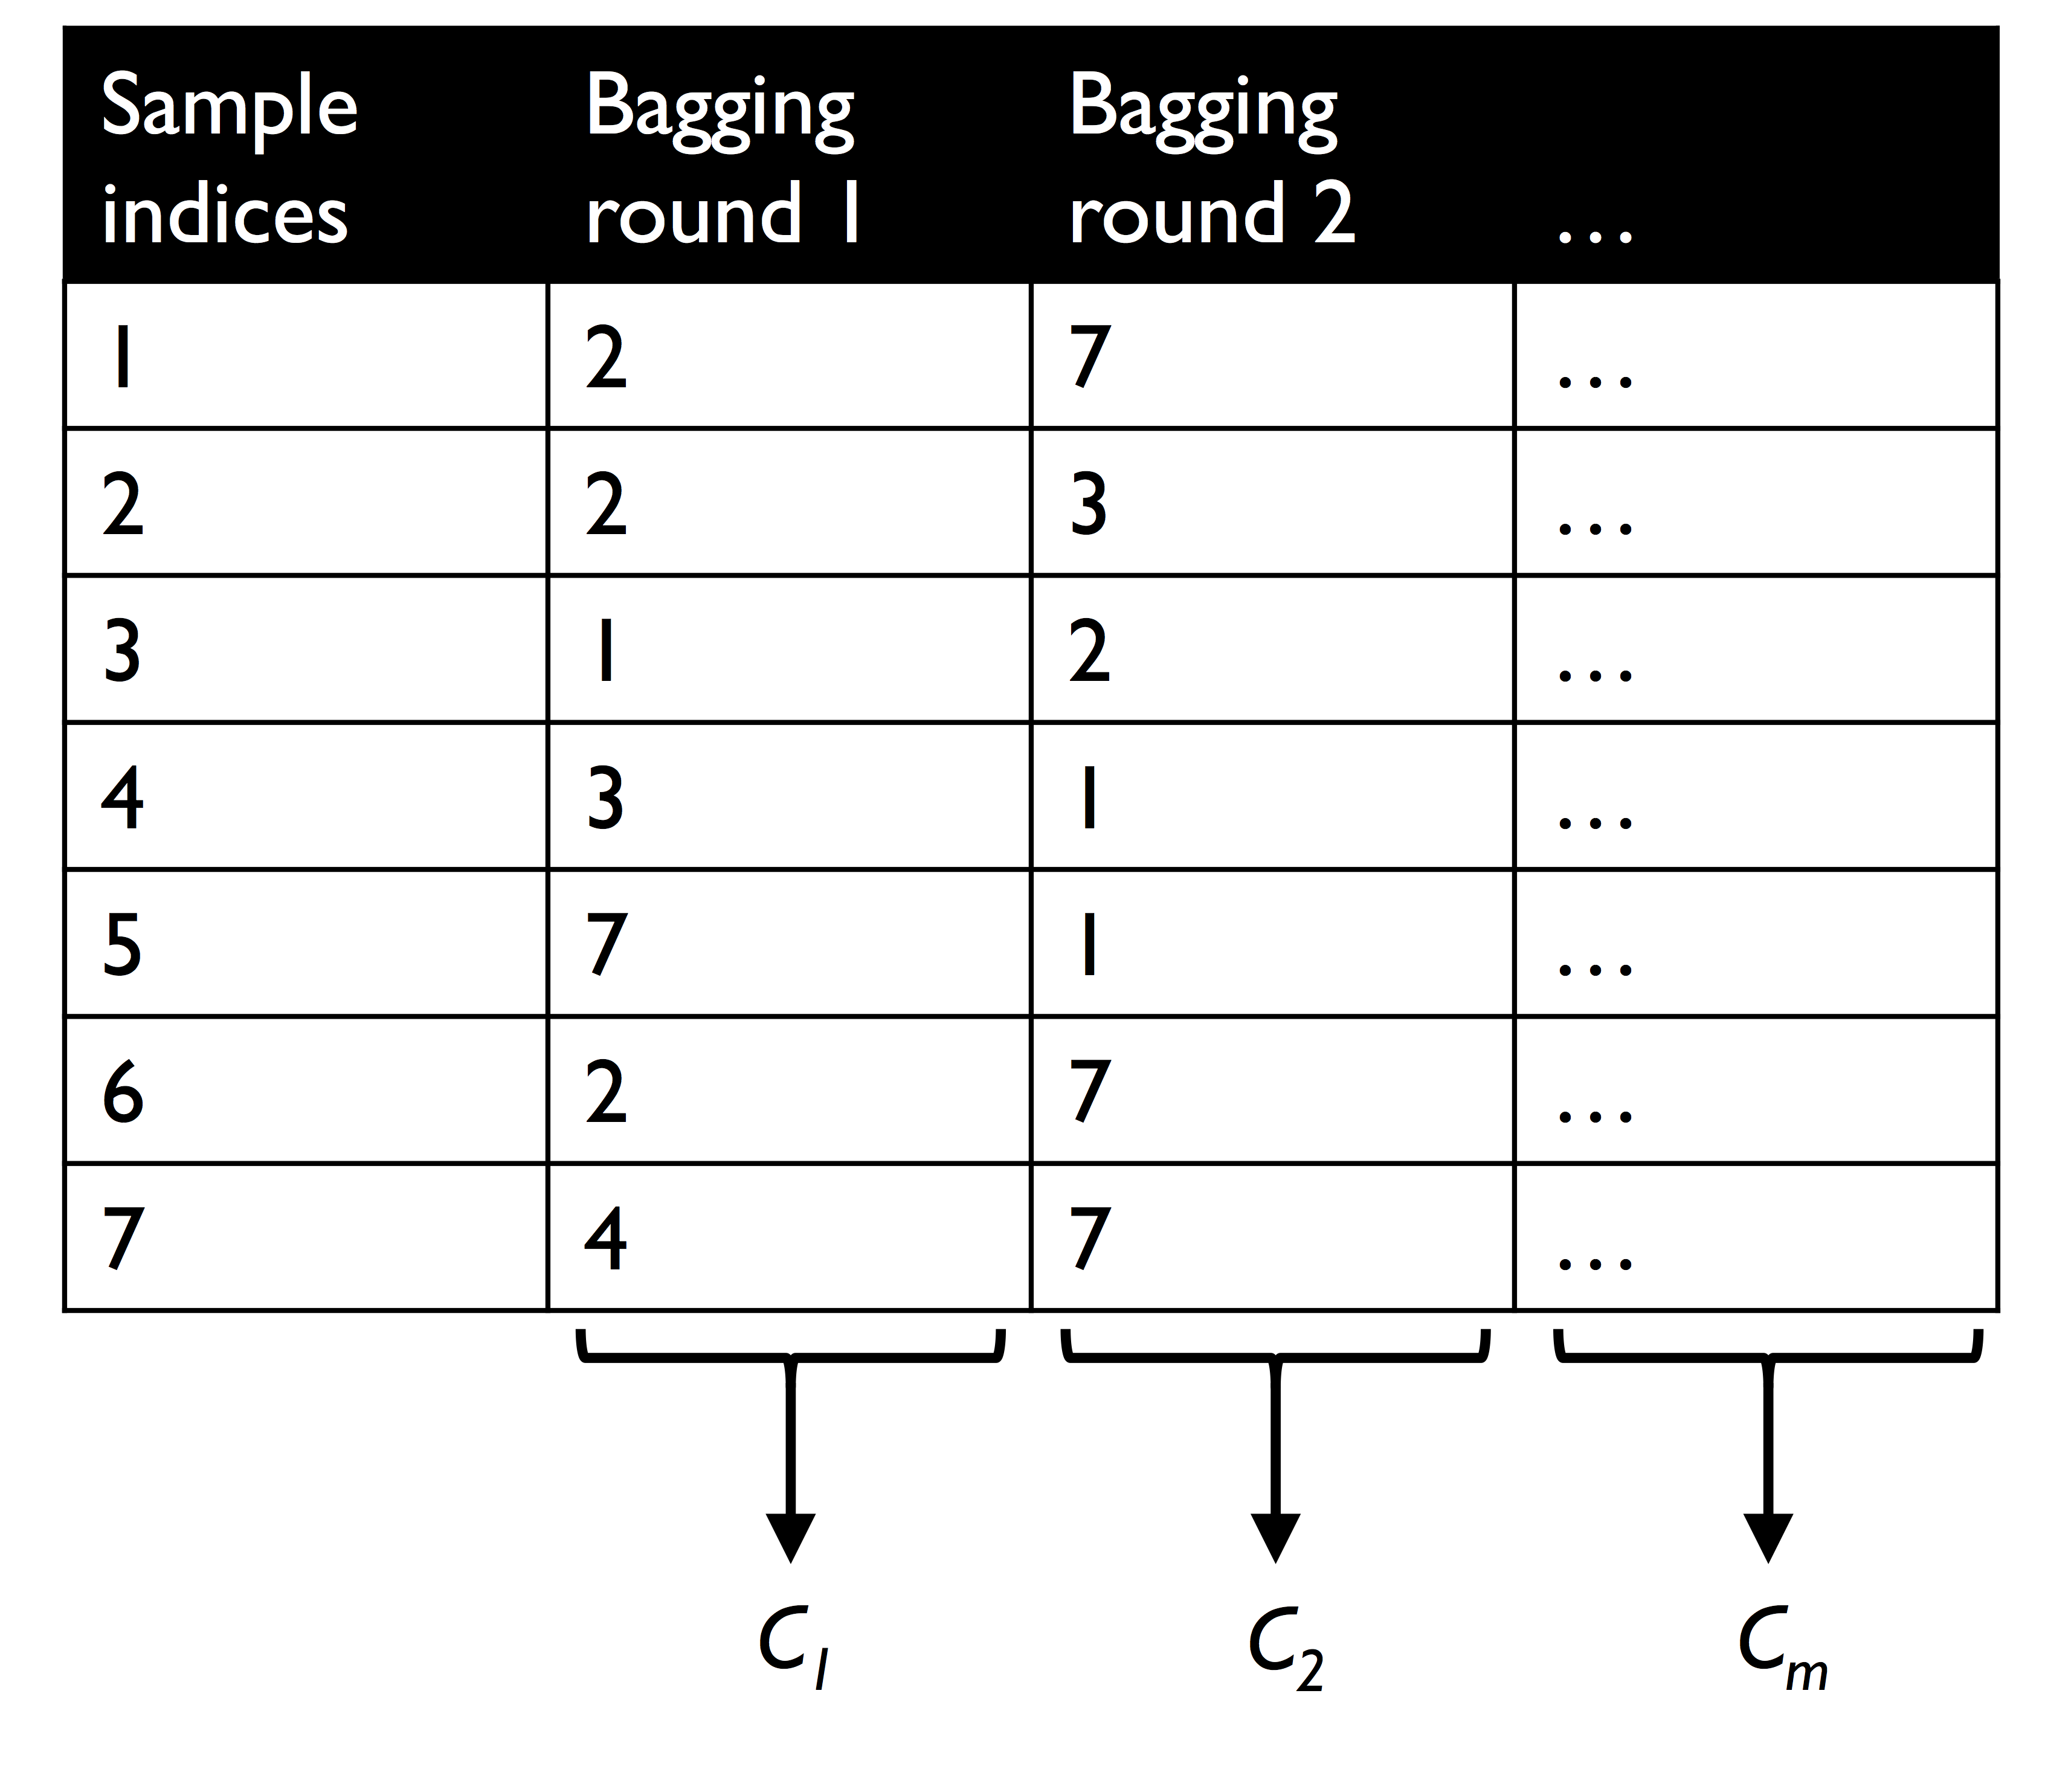

### Bagging sul Dataset Wine

In [22]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# se indisponibile, caricare da locale
# df_wine = pd.read_csv('wine.data', header=None)

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [25]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Accuratezza DecisionTree (train/test)\t %.3f/%.3f' % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Acc. Bagging (train/test)\t %.3f/%.3f' % (bag_train, bag_test))

Accuratezza DecisionTree (train/test)	 1.000/0.833
Accuratezza Bagging (train/test)	 1.000/0.917


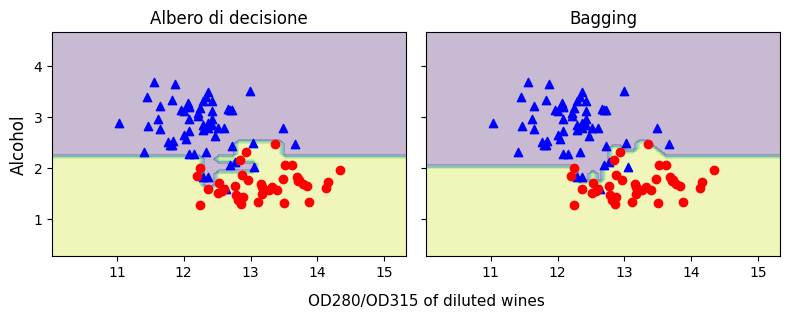

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Albero di decisione', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, s='OD280/OD315 of diluted wines', ha='center', va='center', 
         fontsize=11, transform=axarr[1].transAxes)
plt.show()

### Esempio: confronto di Albero di regressione e Bagging 

dalla [doc]/(https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html) di sklearn

Albero di reg.: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Albero): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


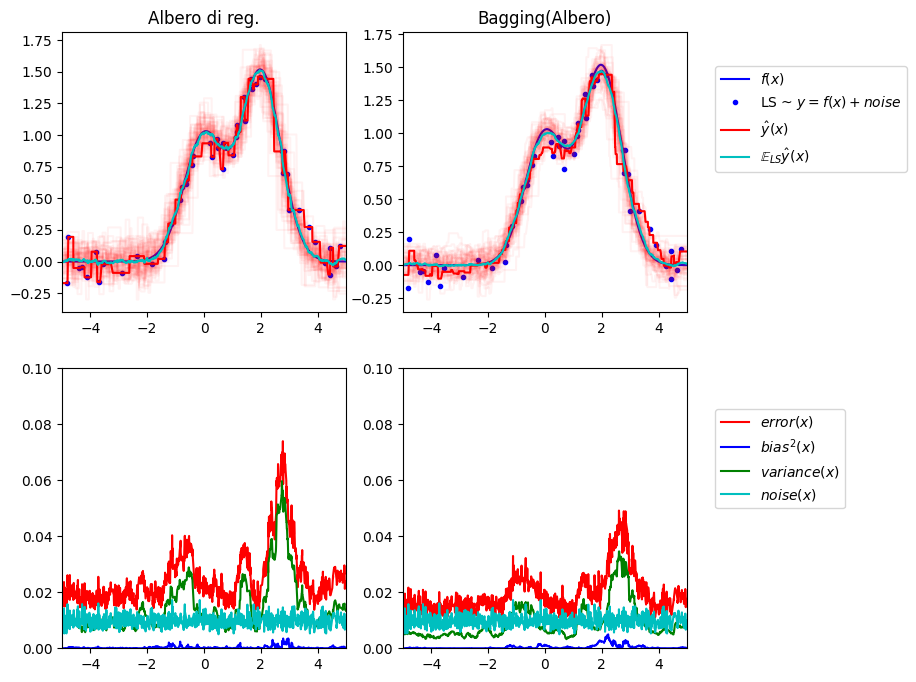

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# impostazioni
n_repeat = 50  # n. di iterate 
n_train = 50  # dim. del training set
n_test = 1000  # dim del test set
noise = 0.1  # dev. std del rumore
np.random.seed(0)

# possibile aggiungere altri modelli
estimators = [
    ("Albero di reg.", DecisionTreeRegressor()),
    ("Bagging(Albero)", BaggingRegressor(DecisionTreeRegressor())),
]

n_estimators = len(estimators)


# Generazione dati
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# ciclo sui modelli
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # decomposizione Bias^2 + Variance + Noise  del MSE
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= n_repeat * n_repeat

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    # Plot 
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()

# Boosting Adattivo di Weak Learner 

### Richiamo sul Boosting

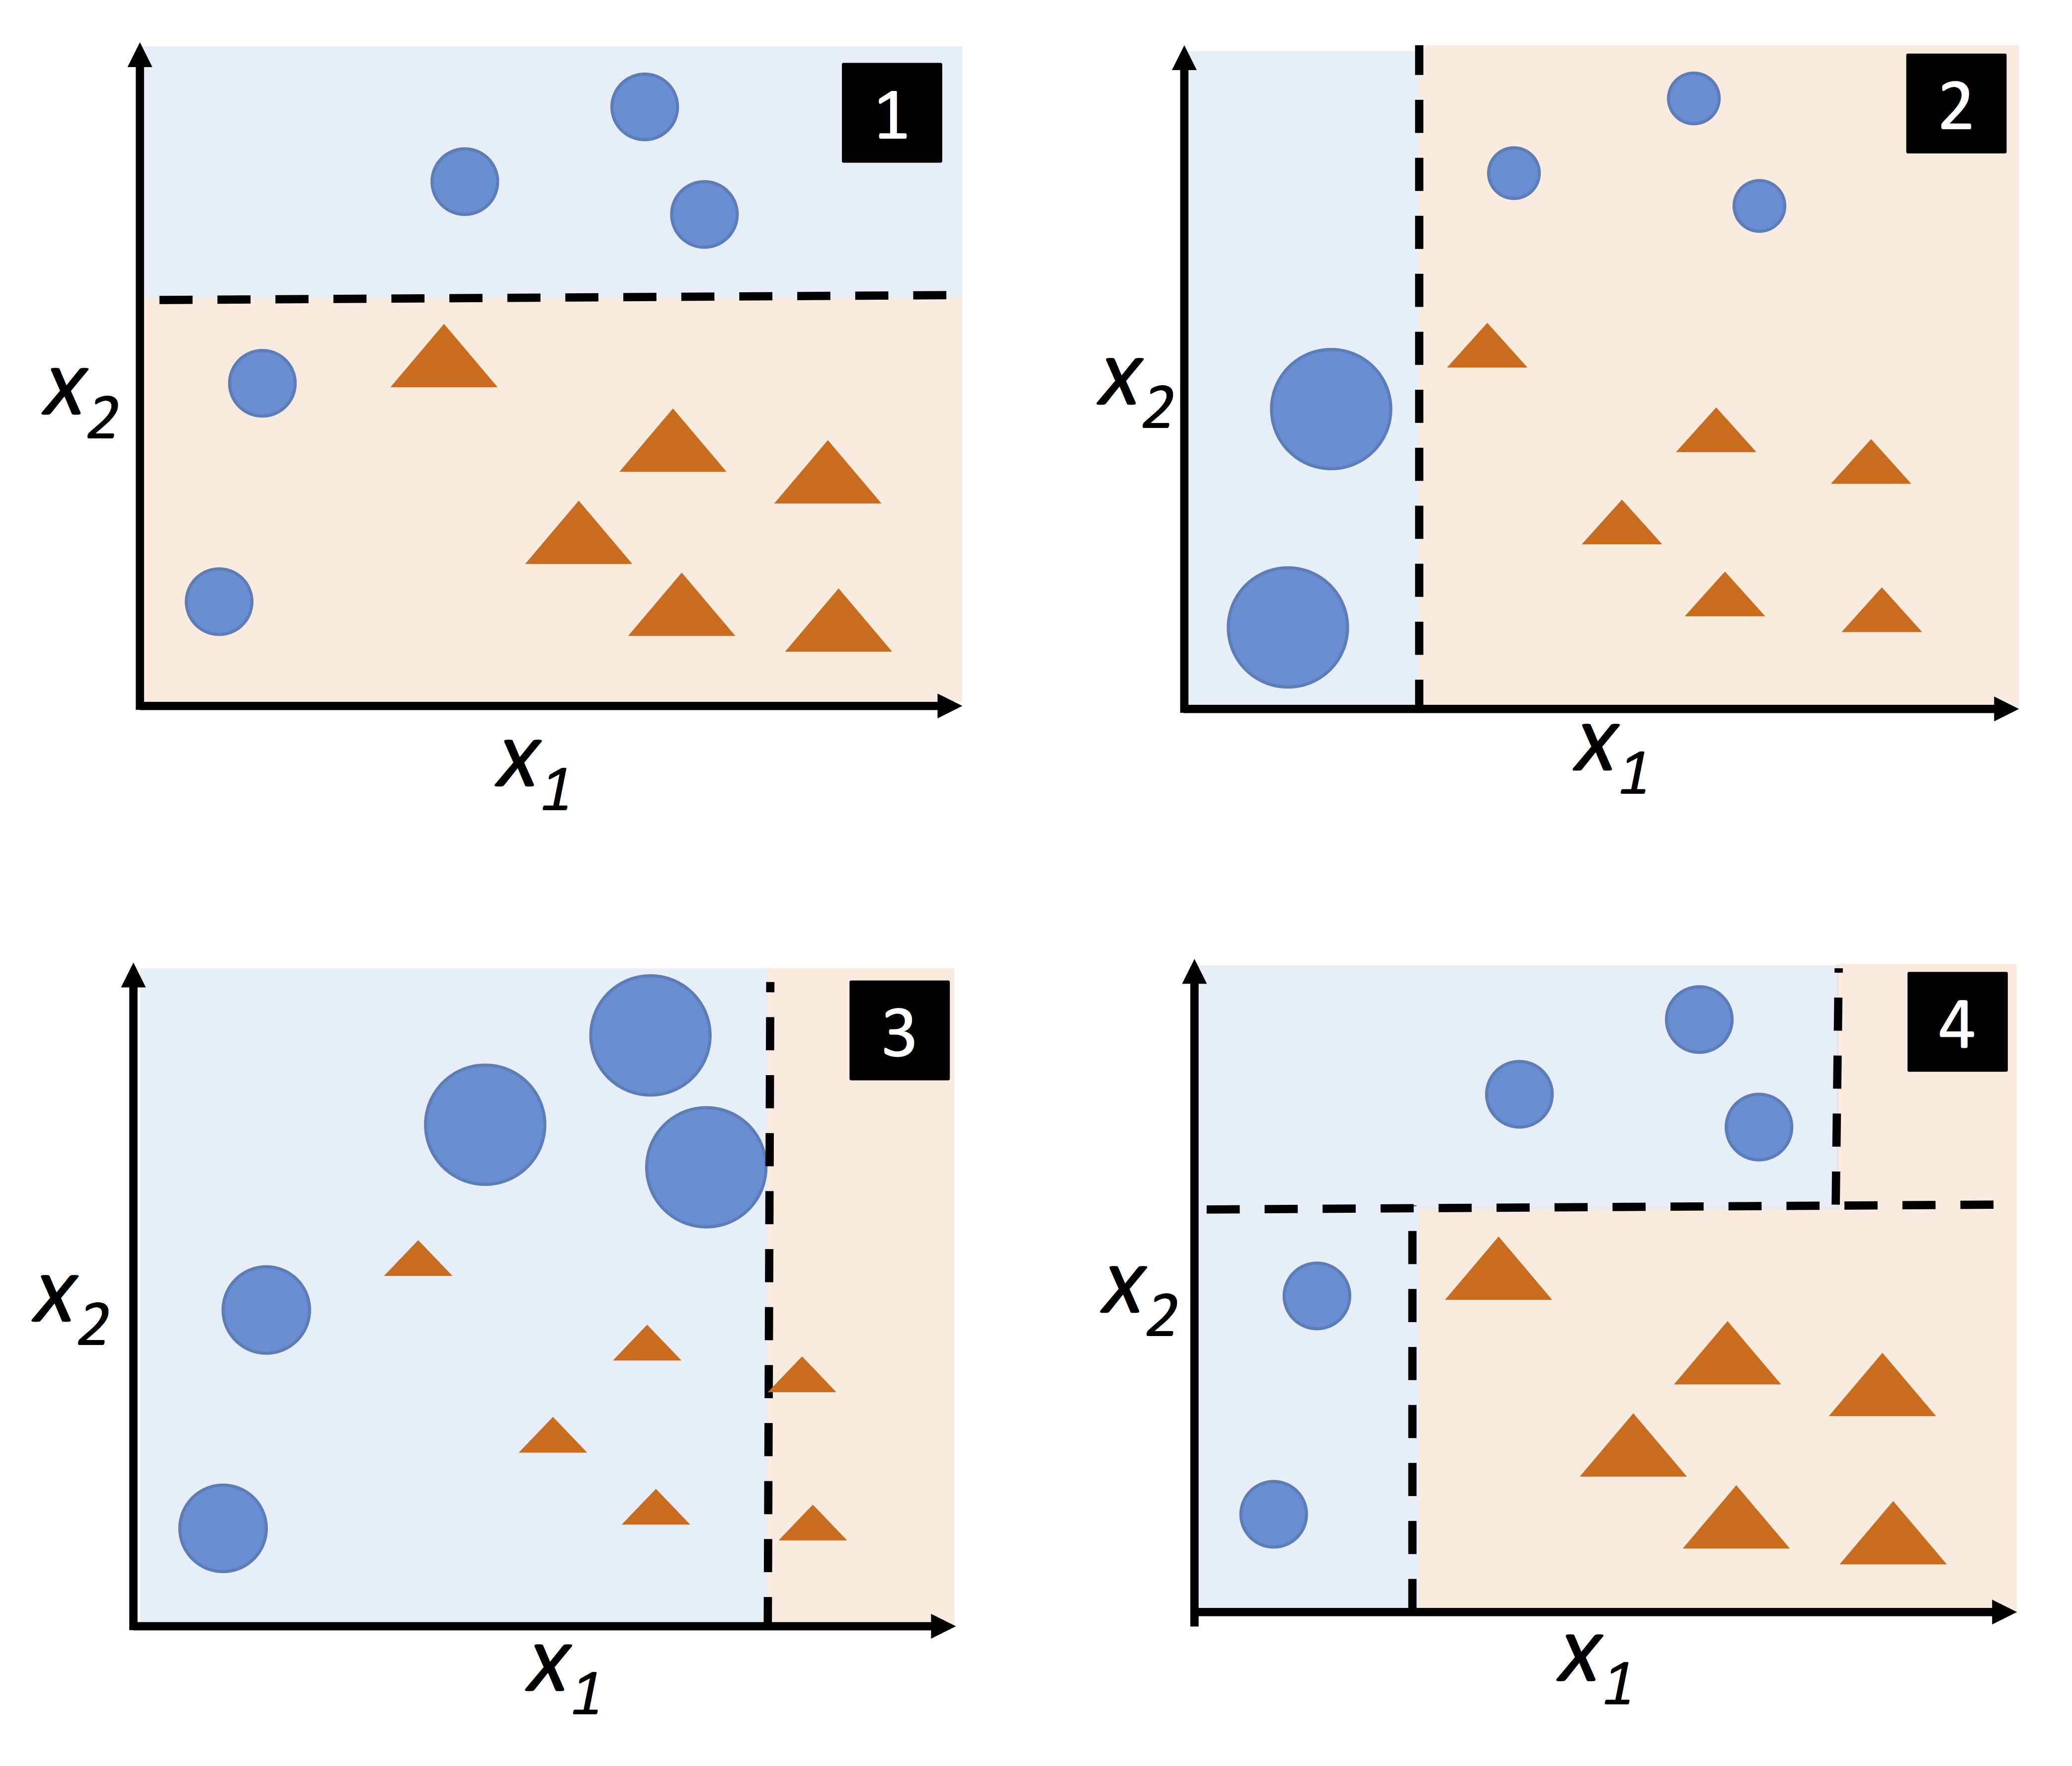

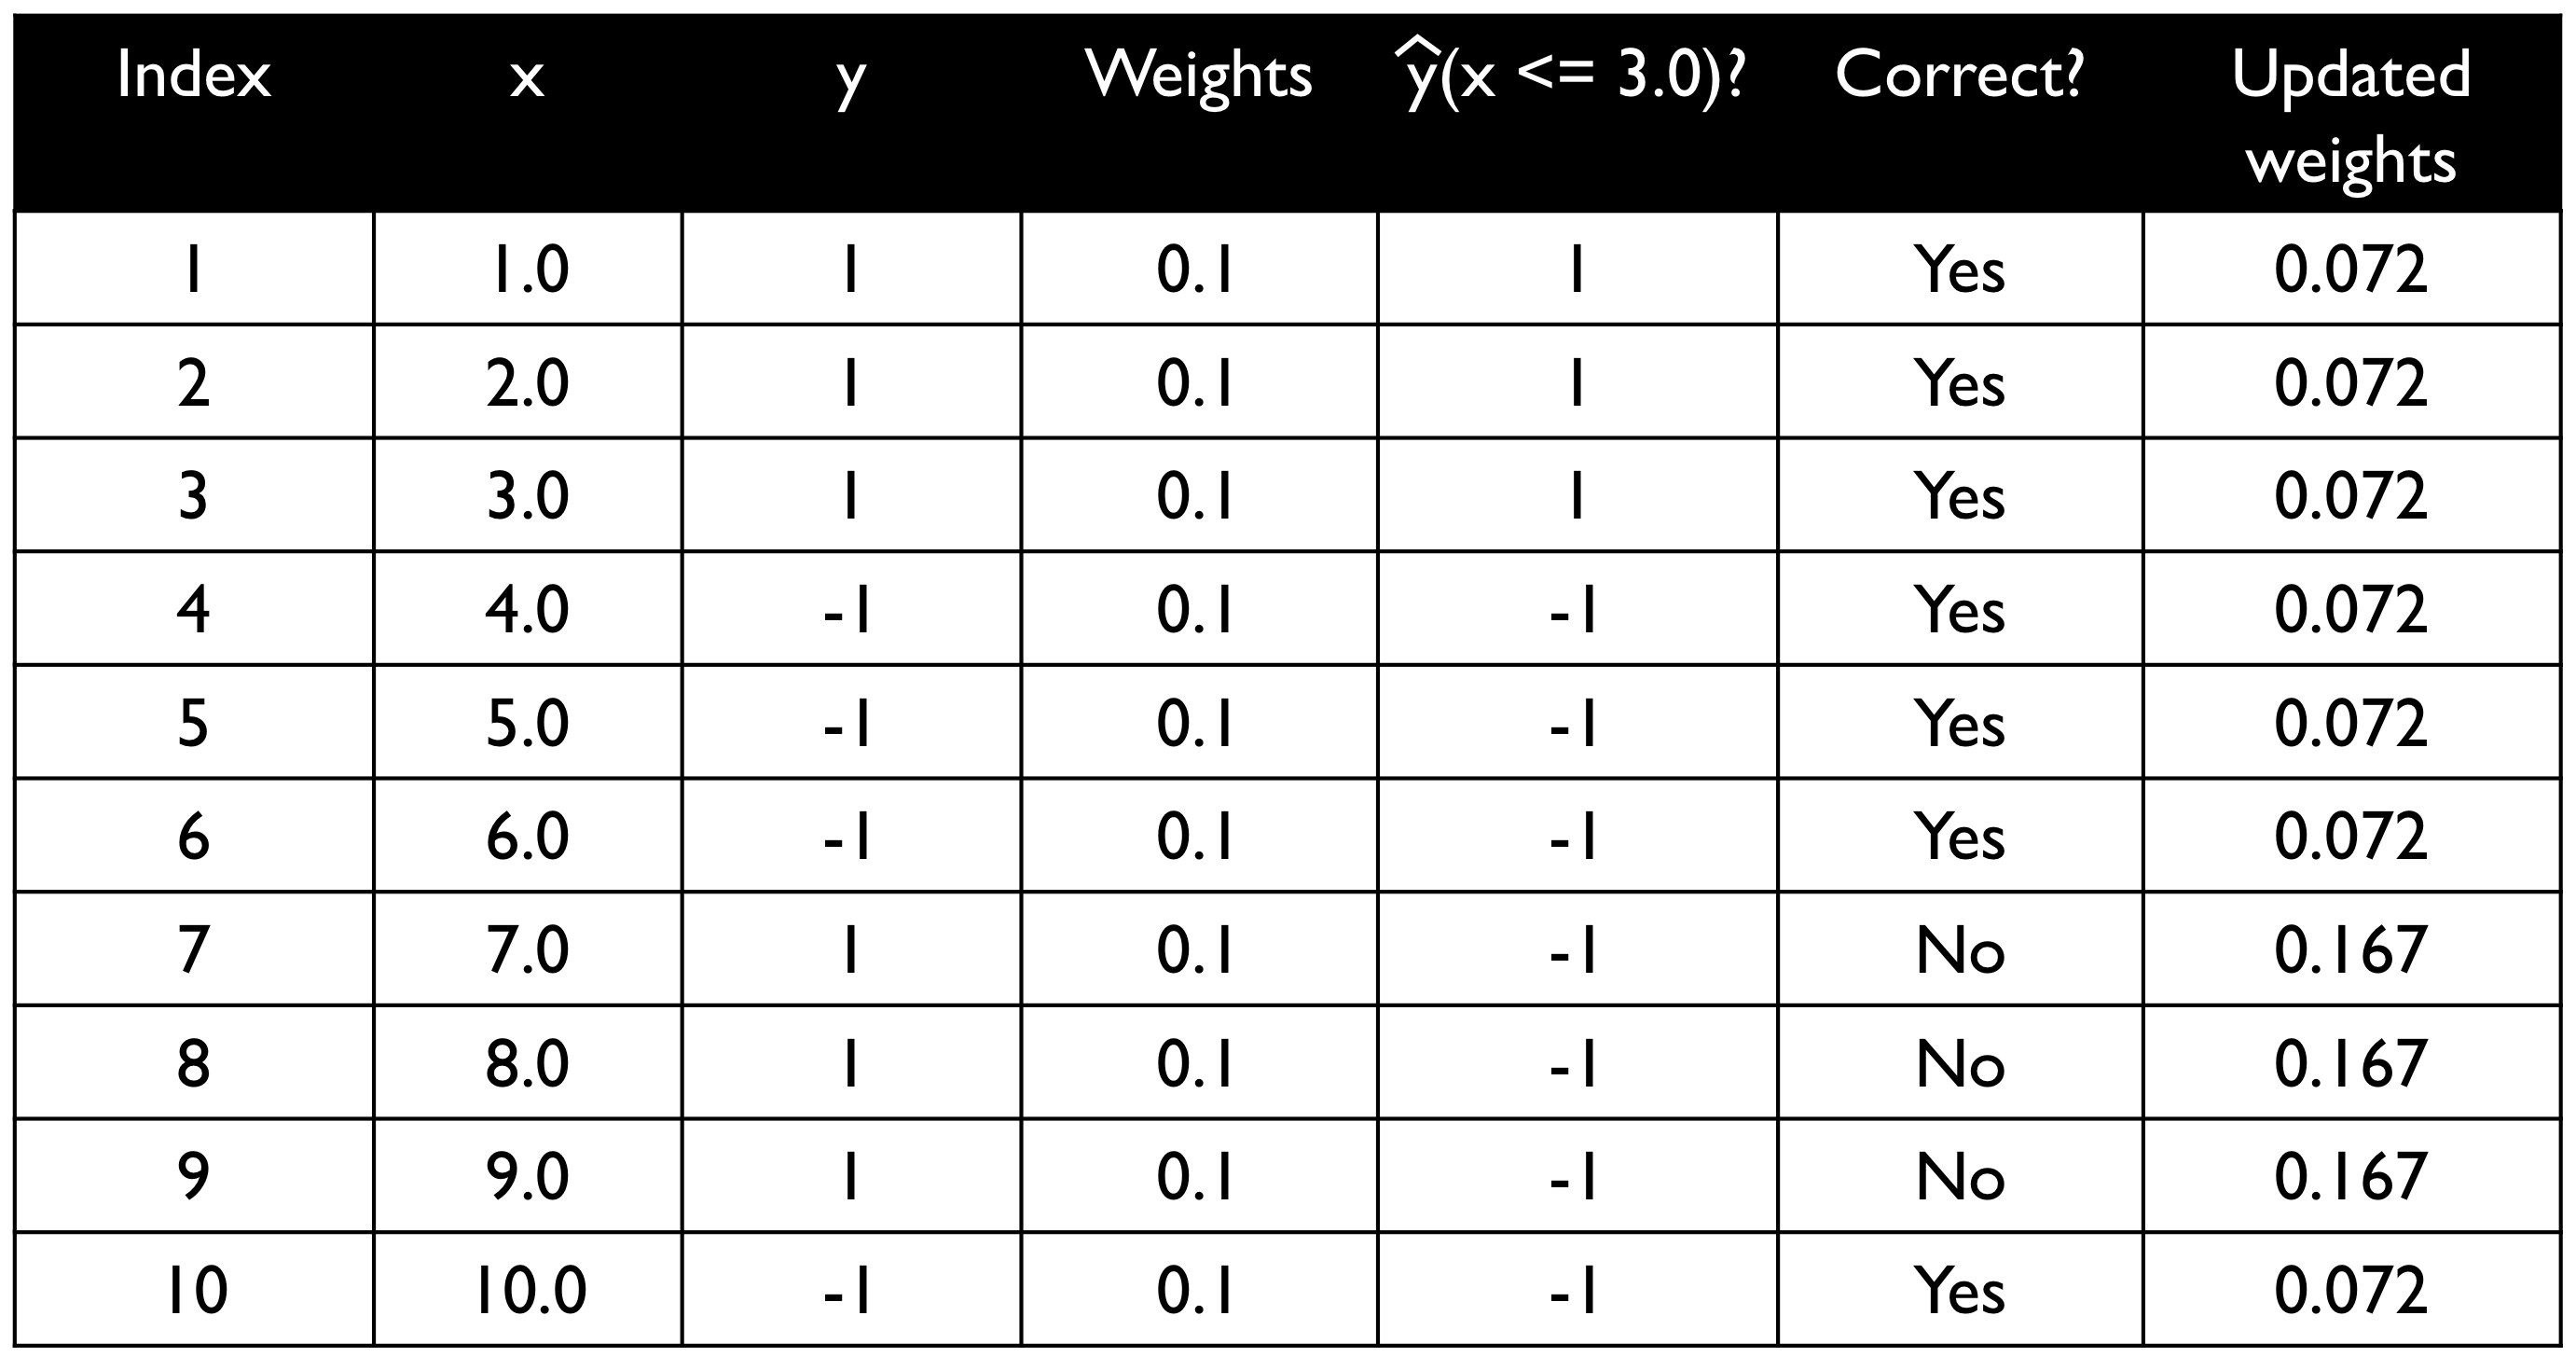

## AdaBoost in `scikit-learn`

In [27]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         #algorithm='SAMME', # 'SAMME.R' deprecato come default
                         random_state=1)

In [28]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Accuratezza DecisionTree (train/test)\t %.3f/%.3f' % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('Accuratezza AdaBoost (train/test)\t %.3f/%.3f' % (ada_train, ada_test))

Accuratezza DecisionTree (train/test)	 0.916/0.875
Accuratezza AdaBoost (train/test)	 0.968/0.917


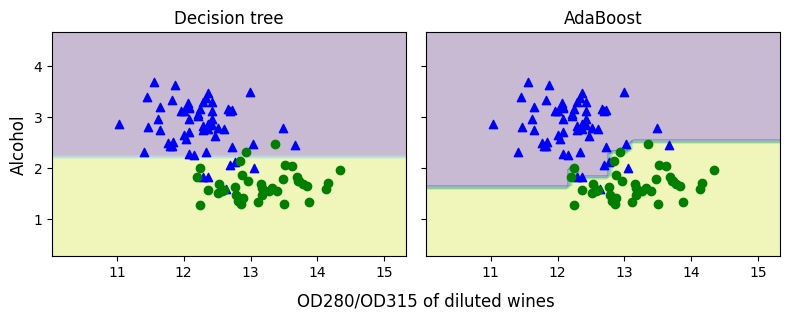

In [29]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))
for idx, clf, tt in zip([0, 1], [tree, ada], ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2, s='OD280/OD315 of diluted wines', ha='center', va='center', 
         fontsize=12, transform=axarr[1].transAxes)
plt.show()

### Alberi di regressione + Adaboost

dalla [doc](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html) di sklearn

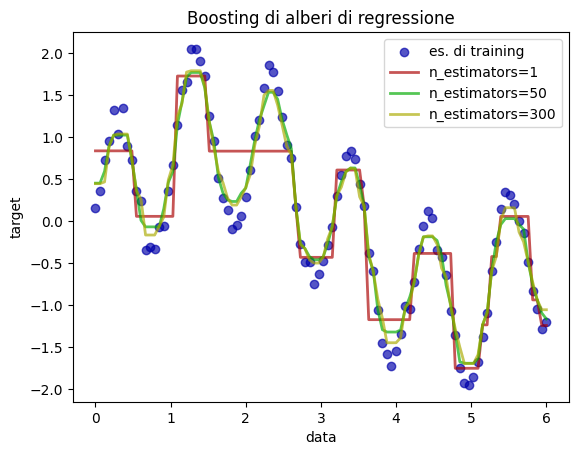

In [54]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=50, random_state=rng
)

regr_3 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)


#plot
plt.figure()
plt.scatter(X, y, color="#0000AAAA", label="es. di training")
plt.plot(X, y_1, color="#AA0000AA", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color="#00AA00AA", label="n_estimators=50", linewidth=2)
plt.plot(X, y_3, color="#AAAA00AA", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosting di alberi di regressione")
plt.legend()
plt.show()

### Confronto RF vs. HG Boosting

dalla [doc](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_hist_grad_boosting_comparison.html) sklearn

In [57]:
from sklearn.datasets import fetch_california_housing

# caricamento
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape

print(f"dataset con {n_samples} esempi e {n_features} feature")



dataset con 20640 esempi e 8 feature


In [60]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Num. di core fisici: {N_CORES}")

Num. di core fisici: 4


In [61]:
import pandas as pd

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

models = {
    "Random Forest": RandomForestRegressor(
        min_samples_leaf=5, random_state=0, n_jobs=N_CORES
    ),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(
        max_leaf_nodes=15, random_state=0, early_stopping=False
    ),
}
param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 50, 100]},
    "Hist Gradient Boosting": {"max_iter": [10, 20, 50, 100, 300, 500]},
}
cv = KFold(n_splits=4, shuffle=True, random_state=0)

results = []
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
    ).fit(X, y)
    result = {"model": name, "cv_results": pd.DataFrame(grid_search.cv_results_)}
    results.append(result)

In [67]:
import plotly.colors as colors
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=["Tempo di training vs score", "Tempo di predizione vs score"],
)
model_names = [result["model"] for result in results]
colors_list = colors.qualitative.Plotly * (
    len(model_names) // len(colors.qualitative.Plotly) + 1
)

for idx, result in enumerate(results):
    cv_results = result["cv_results"].round(3)
    model_name = result["model"]
    param_name = list(param_grids[model_name].keys())[0]
    cv_results[param_name] = cv_results["param_" + param_name]
    cv_results["model"] = model_name

    scatter_fig = px.scatter(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
        error_x="std_fit_time",
        error_y="std_test_score",
        hover_data=param_name,
        color="model",
    )
    line_fig = px.line(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=1)
    fig.add_trace(line_trace, row=1, col=1)

    scatter_fig = px.scatter(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
        error_x="std_score_time",
        error_y="std_test_score",
        hover_data=param_name,
    )
    line_fig = px.line(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=2)
    fig.add_trace(line_trace, row=1, col=2)

fig.update_layout(
    xaxis=dict(title="tempo per il training (meglio più basso)"),
    yaxis=dict(title="R2 score per il test (meglio più alto)"),
    xaxis2=dict(title="tempo per la predizione (meglio più basso)"),
    legend=dict(x=0.72, y=0.05, traceorder="normal", borderwidth=1),
    title=dict(x=0.5, text="compromesso valocità-prestazioni degli ensemble di alberi"),
)

## Stacking

La **Stacked generalization** è un metodo di combinazione di stimatori-base (classificatori o regressori) anche diversi utile a ridurre il bias 
+ le predizioni di ogni stimatore-base sono l'input per uno *stimatore finale* al di sopra di essi, addestrato mediante CV, che calcola la predizione 

`StackingClassifier` e `StackingRegressor` forniscono l'implementazione di questa strategia per l'applicazione a problemi, risp., di  classificazione e regressione
- il parametro `estimators`  corrisponde alla lista degli stimatori messi insieme in parallelo sui dati di input
    + va fornito come lista di nomi e stimatori

Esempio dalla doc. di scikit-learn:

In [30]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20, metric='euclidean'))]

`final_estimator` userà le predizioni degli stimatori-base come input <br>sarà un regressore (risp. un classificatore) se si usa uno `StackingRegressor` (uno `StackingClassifier`):

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, 
                                            min_samples_leaf=25, max_features=1, random_state=42)
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [32]:
## training su dataset diabetes

from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

+ Nel training, gli stimatori sono addestrati sull'intero `X_train`
    + verranno usati invocando metodi come `predict` o `predict_proba`
    + per generalizzare evitando il sovradattamento, `final_estimator` viene addestrato su esempi a parte mediante l'uso interno di `sklearn.model_selection.cross_val_predict`
+ Nel caso di `StackingClassifier`, l'output dei classificatori viene controllato dal parametro `stack_method` (una stringa) che si riferisce al metodo da chiamare su ogni stimatore:
    + nome di un metodo dello stimatore, oppure
    + `'auto'` richiede di identificare automaticamente un metodo disponibile
        - ordine di preferenza: `predict_proba`, `decision_function` e `predict`
+ Uno `StackingRegressor` o `StackingClassifier` potrà poi essere usato come ogni altro regressore o classificatore, attraverso i metodi ` predict`, `predict_proba`, e `decision_function` 

In [33]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_test)
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.53


Per ottenere l'output dei singoli stimatori-base si può usare il metodo `transform`:

In [34]:
reg.transform(X_test[:5])

array([[142.36209608, 138.30724927, 146.1       ],
       [179.700576  , 182.89812552, 151.75      ],
       [139.89817956, 132.46803343, 158.25      ],
       [286.95180286, 292.65695767, 225.4       ],
       [126.88317154, 124.1215975 , 164.65      ]])

#### Esempio con Problema di Classificazione (dataset Iris)

In [35]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

X, y = load_iris(return_X_y=True)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(dual=True,random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

[Esempio](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html?highlight=stacking) di uso dello *stacking* più completo dalla doc. di `scikit-learn`

## Voto di maggioranza


In [20]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Reg.Logistica', 'Random Forest', 'Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Acc. %13s: %0.2f (+/- %0.2f)" % (label,scores.mean(), scores.std()))

Acc. Reg.Logistica: 0.95 (+/- 0.04)
Acc. Random Forest: 0.94 (+/- 0.04)
Acc.   Naive Bayes: 0.91 (+/- 0.04)
Acc.      Ensemble: 0.95 (+/- 0.04)


### Esempio: voto pesato

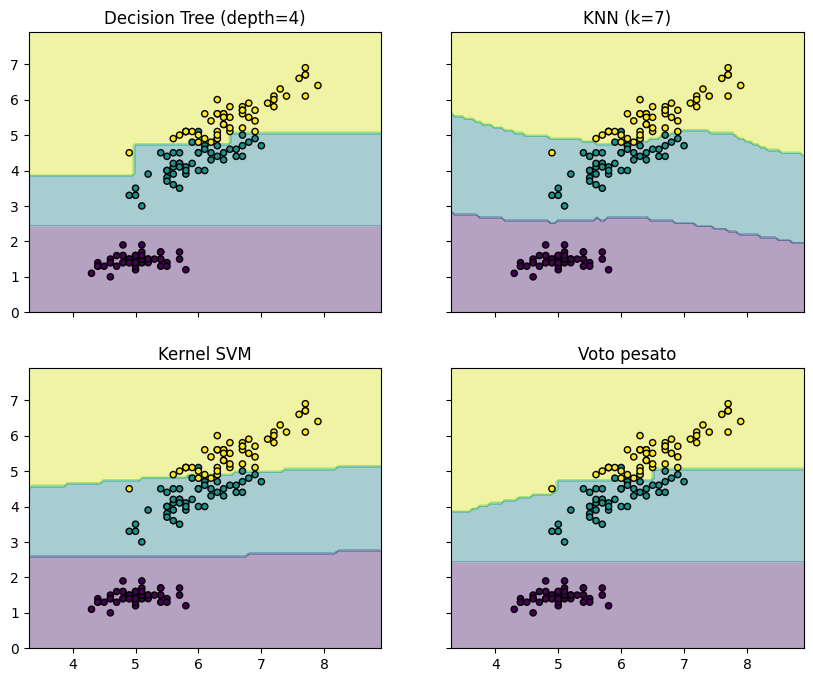

In [21]:
from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# caricamento dati
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training 
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2], #pesi
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plot
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Voto pesato"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Esempio: Regressori + Voto


dalla [doc](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html) sklearn

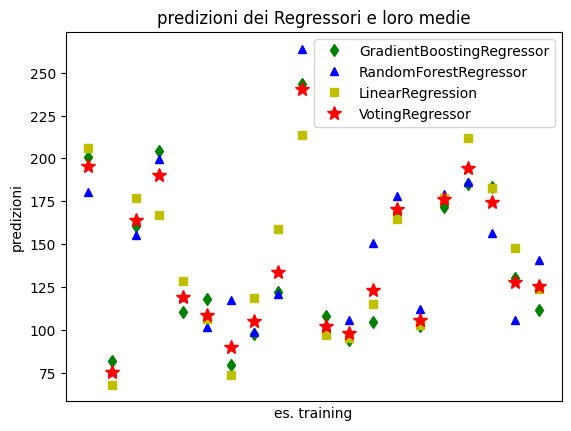

In [40]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)

# Training
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

#plot
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predizioni")
plt.xlabel("es. training")
plt.legend(loc="best")
plt.title("predizioni dei regressori e loro medie")

plt.show()

## (Error-Correcting) Output-Code

`sklearn.multiclass.OutputCodeClassifier` strategia che consiste nel rappresentare ogni classe con un codice binario (0/1)

In ECOC ogni classe rappresentata in uno spazio Euclideo di feature binarie: _code book_ matrice binaria dei codici

- addestramento: un classificatore binario per bit nel code book, _code size_ dimensionalità dello spazio
- predizione: classificatori usati per proiettare nuovi punti nello spazio delle classi e si sceglie la classe più vicina (il suo codice)

_Vantaggio_: numero di classificatori del modello controllato dall'utente
- compromesso fra compressione  (`0 < code_size < 1`) e robustezza agli errori (`code_size > 1`)

Nell'implementazione, si usa un code book generato casualmente

L'attributo `code_size` controlla il numero di classificatori: percentuale rispetto al numero di classi
- numero fra `0` e `1` richiede meno classificatori della strategia _one-vs-the-rest_ ($K$)
    + in teoria, `log2(n_classes) / n_classes` basta a rappresentare le classi in maniera non ambigua 
    + in pratica, `log2(n_classes)` $\ll$ `n_classes`, non assicurando accuratezza
- numero maggiore di `1` richiede più classificatori di one-vs-the-rest
    + alcuni di essi serviranno a _correggere_ eventuali _errori_ commessi da altri
        - come anche nel bagging
    + in pratica, potrebbe non succedere essendo gli errori tipicamente correlati 

In [36]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = OutputCodeClassifier(estimator=DecisionTreeClassifier(random_state=0), random_state=0).fit(X, y)

clf.predict([[0, 0, 0, 0]])

array([1])

## Altri Utilizzi

### Isolation Forest

**Algoritmo Isolation Forest** Modello che restituisce l'*anomaly score* di ogni campione 

- `IsolationForest` ‘isola’ osservazioni costruendo alberi attraverso il classico meccanismo di partizionamento ricorsivo (con scelta delle feature e dei valori di split)
    + Struttura dell'albero $\to$ numero di suddivisioni richieste per isolare un campione equivalente alla *lunghezza del percorso* dalla radice alla foglia
        - mediata su una foresta di alberi casuali, tale lunghezza è una *misura di normalità* utilizzabile per una funzione di decisione 
    + Il partizionamento casuale produce cammini nettamente *più corti* per casi anomali
        - quando una foresta di alberi casuali nel complesso produce per particolari istanze cammini di lunghezza più breve, è altamente probabile che queste siano anomale
    + L'implementazione è basata su un ensemble di `ExtraTreeRegressor` 
        - profondità max = `ceil(log_2(n))` dove `n` è il numero di istanze usate per costruire l'albero 

In [37]:
from sklearn.ensemble import IsolationForest

X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

### Random Trees Embedding

`RandomTreesEmbedding` Trasformazione non supervisionata di un dataset in una rappresentazione sparsa con elevato numero di dimensioni

+ algoritmo basato su un ensemble di alberi totalmente casuali
+ punto codificato in base alla foglia di ciascun albero nella quale viene instradato
+ _one-hot encoding_ delle foglie $\to$ codifica binaria 
    - tanti `1` quanti sono gli alberi nella foresta

Dimensionalità della rappresentazione risultante: `n_out <= n_estimators * max_leaf_nodes`
+ Se `max_leaf_nodes == None`, il numero di foglie è al più `n_estimators * 2 ** max_depth`

In [38]:
from sklearn.ensemble import RandomTreesEmbedding

X = [[0,0], [1,0], [0,1], [-1,0], [0,-1]]
random_trees = RandomTreesEmbedding(n_estimators=5, random_state=0, max_depth=1).fit(X)
X_sparse_embedding = random_trees.transform(X)
X_sparse_embedding.toarray()

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.]])

**Esercizi**: 
+ usare `IsolationForest` per risolvere un problema di ricerca di outlier
    - cercare altre classi dedicate allo stesso problema, ai fini di un confronto empirico
+ usare `RandomTreesEmbedding` per semplificare un problema di classificazione

# Esercizi

- confronto su un dataset per la _classificazione_ (es. WBC) di modelli basati su alberi
    - albero di decisione
    - voting classifier di alberi semplici (es. profondità max 2)
    - foresta casuale di alberi semplici
    - bagging di alberi semplici
    - boosting di alberi semplici
        - NB: 
            - CV esterna per variare i test set 
            - (Grid/Randomized) CV interna per il fine-tuning degli iperparametri
 
- replicare il confronto su dataset / problema di _regressione_